<a href="https://colab.research.google.com/github/pbellot/ANF-TDM/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse de sentiment sur les critiques d'IMDB

Le corpus d'origine peut être téléchargé ici : http://ai.stanford.edu/~amaas/data/sentiment/. Il contient plusieurs répertoires et autant de fichiers que de critiques de films.
Pour l'utiliser : placer le fichier (.tar.gz) téléchargé dans le répertoire du projet et le décompresser. Il faut ensuite le mettre en forme en utilisant le code fourni plus bas.

Le corpus déjà mis en forme en un seul fichier .csv est disponible ici : https://drive.google.com/file/d/1LnfB59FpNkmX3xVXAL3oc4YyeAIiXod5/view?usp=sharing

**Code source inspiré de** : https://towardsdatascience.com/machine-learning-word-embedding-sentiment-classification-using-keras-b83c28087456

### Connexion du notebook à votre Google Drive pour accéder aux données

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***!! Pensez à vérifier ou changer ci-dessous le nom du répertoire de départ dans votre Google Drive***

In [2]:
repertoire_depart = '/content/drive/MyDrive/Colab Notebooks/'

## Les import nécessaires

*NB : les modules doivent avoir auparavant été installés dans votre environnement Python. Cela peut se faire via la commande conda install si vous utilisez le gestionnaire conda/anaconda ou bien via pip. Dans le cadre de Google Colab, tous les modules sont déjà pré-installés, à l'exception de MulticoreTSNE.*


In [3]:
!pip install WordCloud

In [7]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 73.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.1 MB/s eta 0:00:00


In [4]:
import gensim

In [9]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from wordcloud import WordCloud

In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, Flatten
from keras.initializers import Constant

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics  import accuracy_score
from sklearn.metrics  import classification_report
from sklearn.metrics  import roc_curve
from sklearn.metrics  import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [ ]:
#Cette cellule ne doit PAS être utilisée avec Google Colab : MulticoreTSNE n'est plus compatible
#A la place, utiliser la version standard de TSNE présente dans scikit-learn
!pip install MulticoreTSNE
from MulticoreTSNE import MulticoreTSNE as TSNE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MulticoreTSNE-0.1.tar.gz (20 kB)
  ERROR: Failed building wheel for MulticoreTSNE
  Running setup.py clean for MulticoreTSNE
Failed to build MulticoreTSNE
    Running setup.py install for MulticoreTSNE ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-2fnu0xnn/multicoretsne_1280b55897dc4119ae9771e56f137755/setup.py'"'"'; __file__='"'"'/tmp/pip-install-2fnu0xnn/multicoretsne_1280b55897dc4119ae9771e56f137755/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-zv1oh1qh/install-record.txt --single-version-externally-manag

ModuleNotFoundError: ignored

In [10]:
from sklearn.manifold import TSNE

In [11]:
# à faire systématiquement pour Google Colab
# à ne faire que lors de la 1ère utilisation du Notebook si exécution en local
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Si utilisation du code en local (= hors de Google Colab) pour l'installation de Tensorflow, voir : https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html

##### sur MacOS :
- voir https://www.tensorflow.org/install?hl=fr
- SI vous avez déjà un environnement prêt (XCode, Anaconda / Brew, Python 3.7.x, PyCharm) :
         utiliser conda peut être nécessaire selon le CPU : conda install tensorflow=2.0.0 (avec Python 3.7.1)
         (les versions de tensorflow installées par PyCharm 2020 peuvent ne pas fonctionner)
- SINON suivre : https://www.pyimagesearch.com/2019/12/09/how-to-install-tensorflow-2-0-on-macos/
- il est possible d'utiliser un GPU, y compris AMD :  https://github.com/plaidml/plaidml
- pour Mac OS 11 (Intel ou M1), voir : https://github.com/apple/tensorflow_macos

## Si utilisation à partir du corpus IMDB non mis en forme en .csv
Le code ci-dessous n'est à exécuter que dans le cas où vous n'utilisez pas le corpus déjà mis en forme. Il vous permet de voir quelques manipulations de fichiers en Python pour aboutir ici à un seul fichier .csv réunissant l'ensemble des données.

La première étape consiste à intégrer l'ensemble des critiques annotées (polarité négative ou positive)
en un seul fichier au format CSV qui pourra être stocké en mémoire par un DataFrame (extension Pandas de Python).

### Création du fichier .csv global à partir du corpus d'origine

In [ ]:
#%%

# Conversion du corpus d'origine en un fichier .csv

import pandas as pd
import os

labels = {'pos':1, 'neg' : 0}
df = pd.DataFrame()
for f in ('test', 'train'):
    for l in ('pos', 'neg'):
        path = os.path.join(repertoire_depart, f, l)
        for fichier in os.listdir(path):
            with open(os.path.join(path, fichier), 'r', encoding='utf-8') as infile:
                txt = infile.read()
            df = df.append([[txt, labels[l]]], ignore_index=True)
df.columns=['review', 'polarity']

df.to_csv(nomCSV, index=False, encoding='utf-8')
df.head()

## Lecture du fichier .csv (corpus de données déjà mis en forme)

Le corpus IMDB mis en forme en un seul fichier .csv (62 Mo) est disponible ici :
- https://drive.google.com/file/d/1LnfB59FpNkmX3xVXAL3oc4YyeAIiXod5/view?usp=sharing
- https://www.icloud.com/iclouddrive/0_WX0yxTHJXU4rd6GEeSTutWQ#movie_data

Vous devez le dupliquer sur votre Google drive personnel et le positionner dans votre "repertoire_depart" indiqué au début du carnet.

In [12]:
nomCSV = repertoire_depart+'/movie_data.csv'

In [13]:
df = pd.read_csv(nomCSV, encoding='utf-8')
df.head()

review  polarity
0  Based on an actual story, John Boorman shows t...         1
1  This is a gem. As a Film Four production - the...         1
2  I really like this show. It has drama, romance...         1
3  This is the best 3-D experience Disney has at ...         1
4  Of the Korean movies I've seen, only three had...         1

## Exploration du corpus et premiers éléments statistiques

In [14]:
print("Nombre total de critiques : ", len(df))
print("Nombre de critiques positives : ", len(df[df['polarity']==1]))
print("Nombre de critiques négatives : ", (df['polarity']==0).sum())
print("polarité : ", df['polarity'][1], " -- ", df['review'][1])
print("polarité : ", df['polarity'][2], " -- ", df['review'][2])

Nombre total de critiques :  50000
Nombre de critiques positives :  25000
Nombre de critiques négatives :  25000
polarité :  1  --  This is a gem. As a Film Four production - the anticipated quality was indeed delivered. Shot with great style that reminded me some Errol Morris films, well arranged and simply gripping. It's long yet horrifying to the point it's excruciating. We know something bad happened (one can guess by the lack of participation of a person in the interviews) but we are compelled to see it, a bit like a car accident in slow motion. The story spans most conceivable aspects and unlike some documentaries did not try and refrain from showing the grimmer sides of the stories, as also dealing with the guilt of the people Don left behind him, wondering why they didn't stop him in time. It took me a few hours to get out of the melancholy that gripped me after seeing this very-well made documentary.
polarité :  1  --  I really like this show. It has drama, romance, and comedy

### Analyse globale du lexique avec le module NLTK

In [15]:
reviews = df.review.str.cat(sep=' ')

In [16]:
print(reviews[:1000])
print(len(reviews))

Based on an actual story, John Boorman shows the struggle of an American doctor, whose husband and son were murdered and she was continually plagued with her loss. A holiday to Burma with her sister seemed like a good idea to get away from it all, but when her passport was stolen in Rangoon, she could not leave the country with her sister, and was forced to stay back until she could get I.D. papers from the American embassy. To fill in a day before she could fly out, she took a trip into the countryside with a tour guide. "I tried finding something in those stone statues, but nothing stirred in me. I was stone myself." <br /><br />Suddenly all hell broke loose and she was caught in a political revolt. Just when it looked like she had escaped and safely boarded a train, she saw her tour guide get beaten and shot. In a split second she decided to jump from the moving train and try to rescue him, with no thought of herself. Continually her life was in danger. <br /><br />Here is a woman w

In [26]:
tokens = word_tokenize(reviews[:1000000])

In [32]:
vocabulary = set(tokens)
frequency_dist = nltk.FreqDist(tokens)
hapax = frequency_dist.hapaxes()

In [33]:
print("Nombre total de mots ", len(tokens))
print("Nombre de mots différents : ", len(vocabulary))
print("Taille totale des critiques en nombre de caractères :", len(reviews))
print(len(hapax)," mots qui n'apparaissent qu'une fois.")
print("Parmi les mots qui n'apparaissent qu'une seule fois :")
for _ in range(30):
    print(hapax[_], " ", end='')
print('\nLe mot le plus fréquent, ', frequency_dist.max()," , apparait ", frequency_dist[frequency_dist.max()], " fois")

Nombre total de mots  33
Nombre de mots différents :  33


NameError: name 'reviews' is not defined

## Visualisation de la distribution du lexique

<Axes: xlabel='Samples', ylabel='Counts'>

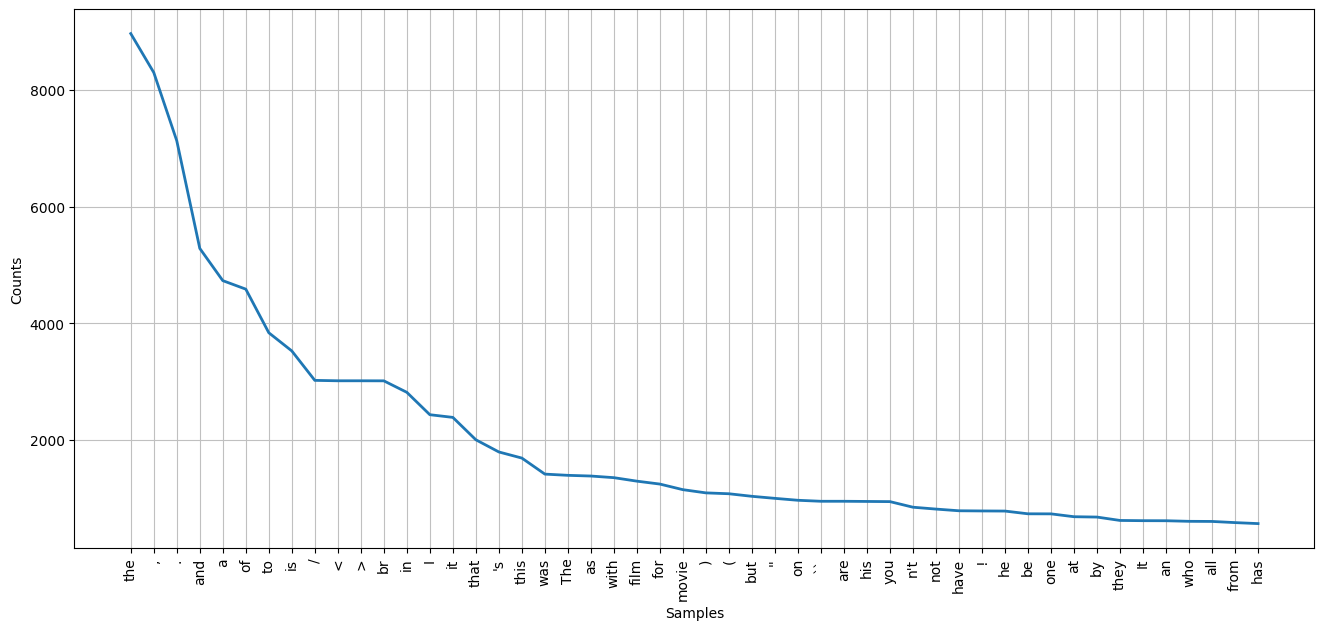

In [29]:
plt.figure(figsize=(16,7))
frequency_dist.plot(50)

### Elimination des mots outils et des mots d'un seul caractère

In [30]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tokens = [w.lower() for w in tokens if not w.lower() in stop_words and len(w)>2]
vocabulary = set(tokens)
print("Taille du vocabulaire : ", len(vocabulary))
frequency_dist = nltk.FreqDist(tokens)
#sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

Taille du vocabulaire :  16430


In [31]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

## Visualisation du lexique après suppression des mots outils

<Axes: xlabel='Samples', ylabel='Counts'>

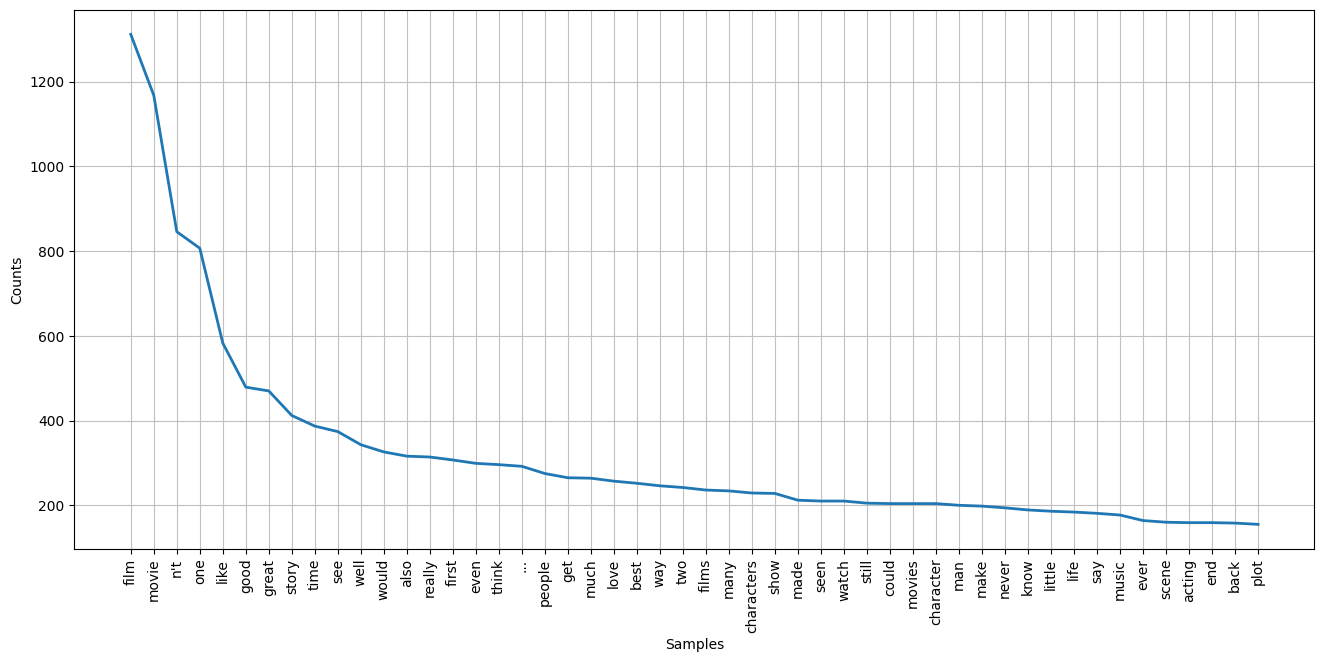

In [32]:
plt.figure(figsize=(16,7))
frequency_dist.plot(50)

## Création de nuages de mots

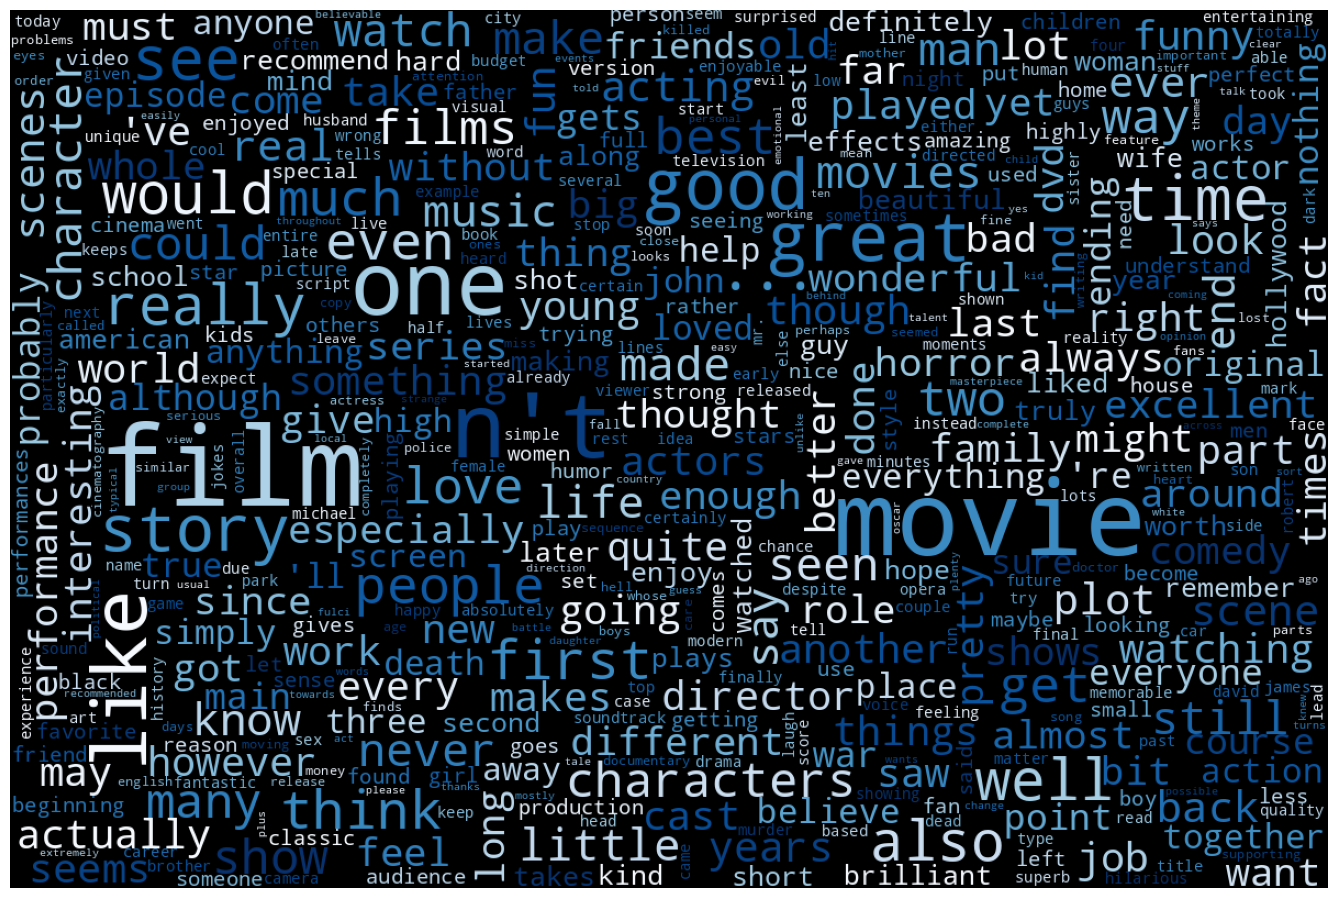

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(width=1200, height=800,
                    max_words=500,
                    max_font_size=100,
                    relative_scaling=0.5,
                    colormap='Blues',
                    normalize_plurals=True).generate_from_frequencies(frequency_dist)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Différenciation entre les critiques positives et les négatives

#### Les critiques positives

In [34]:
reviewsPositives = df.review[df.polarity==1].str.cat(sep=' ')
tokensPos = word_tokenize(reviewsPositives)
tokensPos = [w.lower() for w in tokensPos if not w.lower() in stop_words and len(w)>2]
vocabPos = set(tokensPos)
frequency_dist_Pos = nltk.FreqDist(tokensPos)
#sorted(frequency_dist_Pos,key=frequency_dist_Pos.__getitem__, reverse=True)[0:50]

<Axes: xlabel='Samples', ylabel='Counts'>

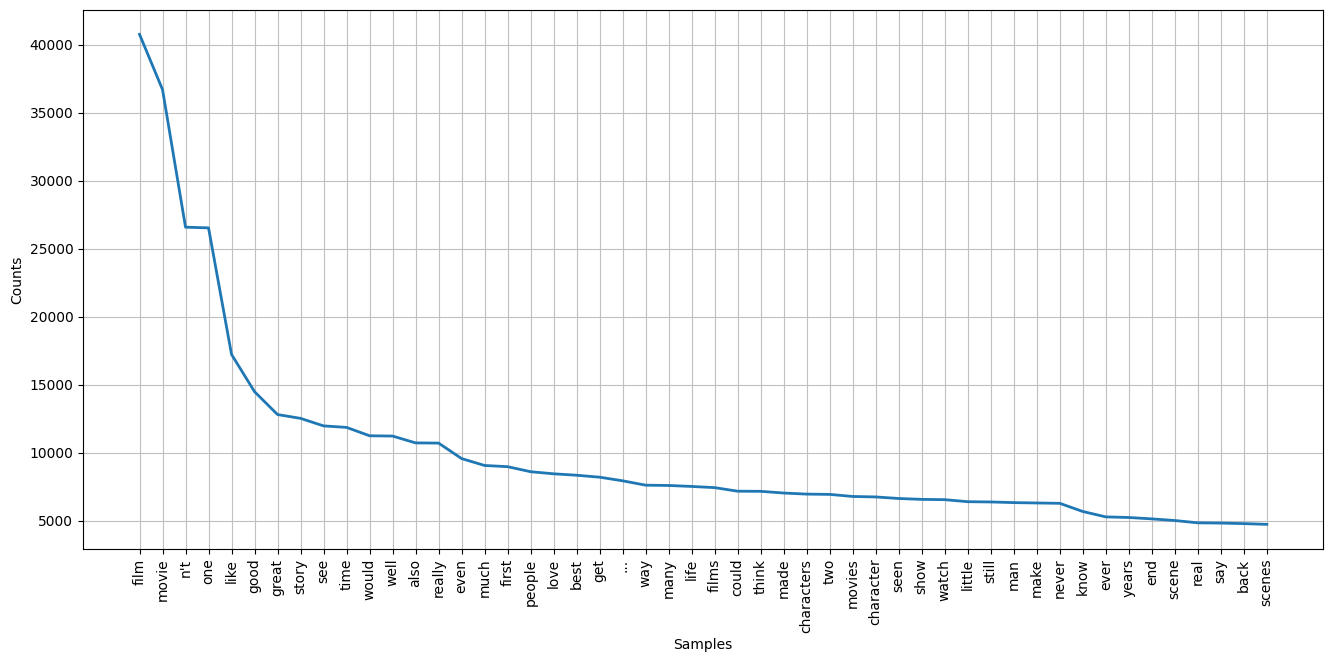

In [35]:
plt.figure(figsize=(16,7))
frequency_dist_Pos.plot(50)

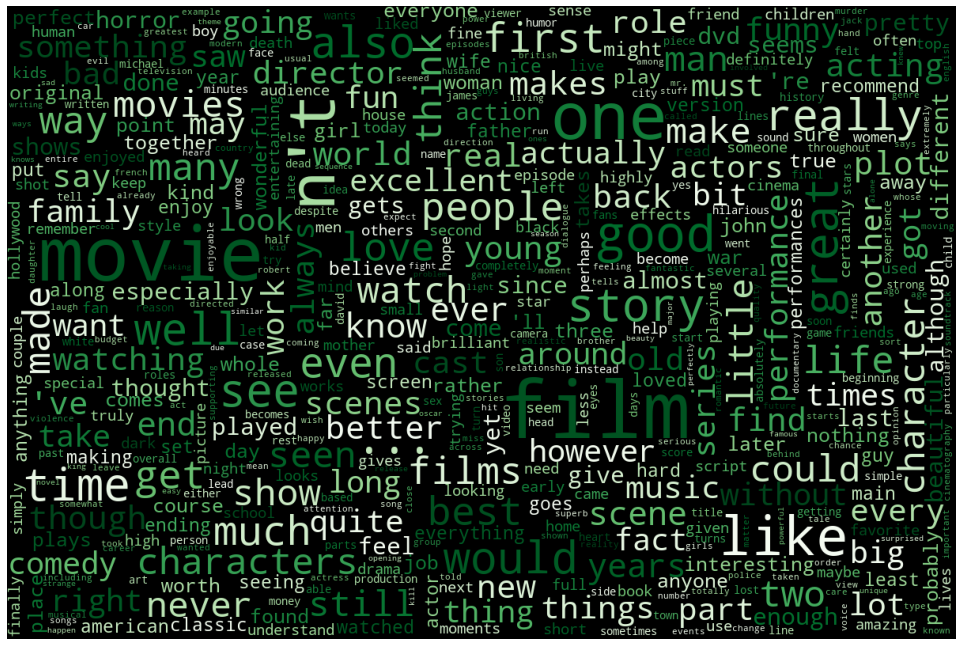

In [ ]:
wordcloud = WordCloud(width=1200, height=800,
                    max_words=500,
                    max_font_size=100,
                    relative_scaling=0.5,
                    colormap='Greens',
                    normalize_plurals=True).generate_from_frequencies(frequency_dist_Pos)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Les critiques négatives

In [ ]:
reviewsNegatives = df.review[df.polarity==0].str.cat(sep=' ')
tokensNeg = word_tokenize(reviewsNegatives)
tokensNeg = [w.lower() for w in tokensNeg if not w.lower() in stop_words and len(w)>2]
vocabNeg = set(tokensNeg)
frequency_dist_Neg = nltk.FreqDist(tokensNeg)
#sorted(frequency_dist_Neg,key=frequency_dist_Neg.__getitem__, reverse=True)[0:50]

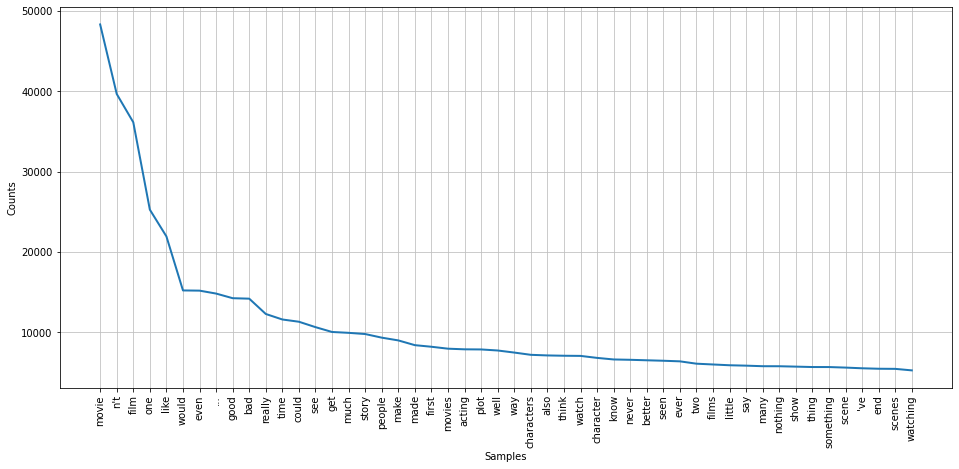

In [ ]:
plt.figure(figsize=(16,7))
frequency_dist_Neg.plot(50)

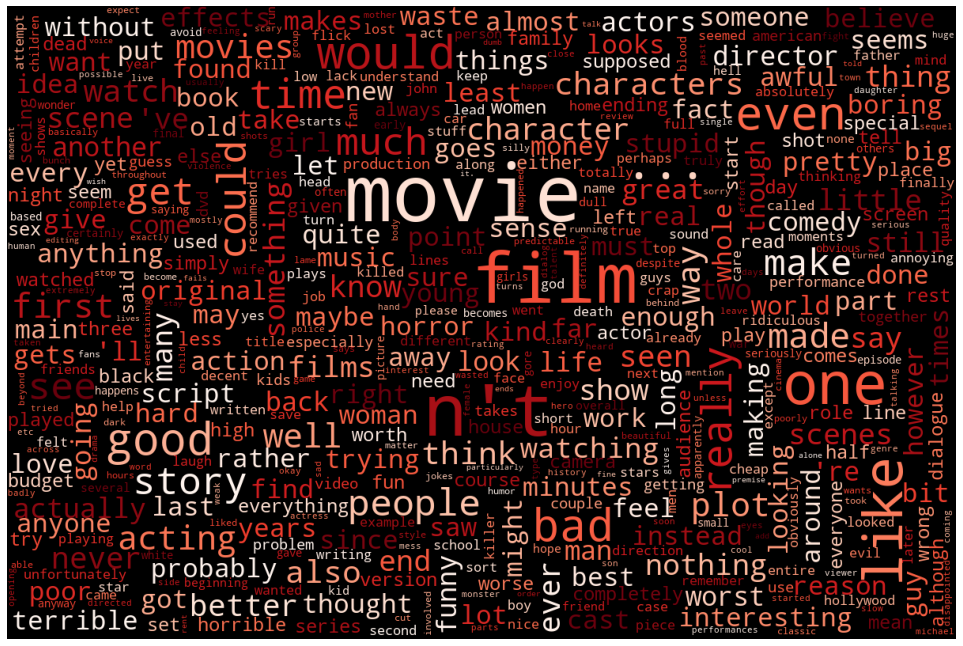

In [ ]:
wordcloud = WordCloud(width=1200, height=800,
                    max_words=500,
                    max_font_size=100,
                    relative_scaling=0.5,
                    colormap='Reds',
                    normalize_plurals=True).generate_from_frequencies(frequency_dist_Neg)
plt.figure(figsize=(17,14))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Une première méthode de classification en polarité positive ou négative
## Utilisation d'un classifieur bayésien

### Subdivision du corpus en 2 parties : l'une pour l'entraînement, l'autre pour le test

In [ ]:
X_train = df.loc[:24999, 'review'].to_numpy() #tableau des exemples de critiques pour l'entraînement --> X_train = le texte des exemples (l'entrée)
y_train = df.loc[:24999, 'polarity'].to_numpy() #pour chaque exemple de critique : sa classe 0 ou 1 --> y_train = sortie attendue
X_test = df.loc[25000:, 'review'].to_numpy() #les données de test = le texte des critiques que l'on veut tester
y_test = df.loc[25000:, 'polarity'].to_numpy() #les vraies classes attendues pour les données de test = ce que l'on veut obtenir

Vectorisation et estimation des poids tf.idf de chaque mot (nombre d'occurrences x log de l'inverse du nombre de critiques contenant le mot).
les valeurs idf sont apprises sur le corpus d'entraînement, les mots outils sont conservés, les 10 000 mots les plus fréquents sont conservés seulement.

Voir https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html?highlight=tfidfvectorizer#sklearn.feature_extraction.text.TfidfVectorizer
pour les paramètres possibles.

In [ ]:
vectorizer = TfidfVectorizer(lowercase=False, max_features=10000)
train_vectors = vectorizer.fit_transform(X_train)
test_vectors = vectorizer.transform(X_test)

In [ ]:
clf = MultinomialNB().fit(train_vectors, y_train)
predicted = clf.predict(test_vectors)

In [ ]:
print(X_test[1], "\nprédit :", predicted[1], "polarité vraie ", y_test[1], "\n Vecteur TF.IDF : ", test_vectors[1])

Bizarre horror movie filled with famous faces but stolen by Cristina Raines (later of TV's "Flamingo Road") as a pretty but somewhat unstable model with a gummy smile who is slated to pay for her attempted suicides by guarding the Gateway to Hell! The scenes with Raines modeling are very well captured, the mood music is perfect, Deborah Raffin is charming as Cristina's pal, but when Raines moves into a creepy Brooklyn Heights brownstone (inhabited by a blind priest on the top floor), things really start cooking. The neighbors, including a fantastically wicked Burgess Meredith and kinky couple Sylvia Miles & Beverly D'Angelo, are a diabolical lot, and Eli Wallach is great fun as a wily police detective. The movie is nearly a cross-pollination of "Rosemary's Baby" and "The Exorcist"--but what a combination! Based on the best-seller by Jeffrey Konvitz, "The Sentinel" is entertainingly spooky, full of shocks brought off well by director Michael Winner, who mounts a thoughtfully downbeat en

Global Accuracy : 0.8454
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     12500
           1       0.85      0.83      0.84     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



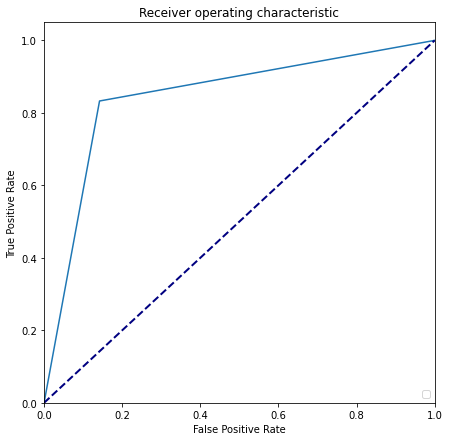

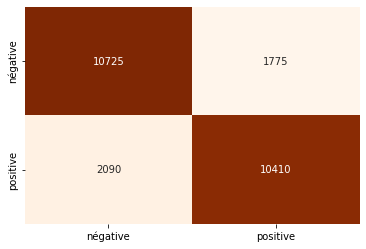

In [ ]:
print("Global Accuracy :", accuracy_score(y_test,predicted)) #y_test = les sorties souhaitées ; predicted = les sorties obtenues
print(classification_report(y_test, predicted))

#Courbe ROC (voir https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py)
fp, tp, _ = roc_curve(y_test, predicted)
plt.figure(figsize=(7,7))
plt.plot(fp, tp, 2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#Matrice de confusion
conf_mat = confusion_matrix(y_test, predicted)

columns = ['négative', 'positive']
df_cm = pd.DataFrame(conf_mat, index=columns, columns=columns)
ax = seaborn.heatmap(df_cm, cmap='Oranges', annot=True, fmt="d", cbar=False)


# Classification par réseau de neurones et plongements lexicaux (word embeddings)

### Pré-traitements (tokenisation, mise en minuscules, élimination des mots outils et des mots d'un seul caractère)


In [14]:
review_lines = list()

for line in df['review']:
    tokens = word_tokenize(line) #sépare les mots
    stop_words = set(stopwords.words('english')) #les mots outils
    tokens = [w.lower() for w in tokens if w.isalpha() and len(w)>1 and not w.lower() in stop_words] #filtre les mots outils et mets mots minuscules
    review_lines.append(tokens)

### Apprentissage des plongements avec une approche Word2Vec
La méthode d'apprentissage est celle de GenSim.
voir : https://radimrehurek.com/gensim/models/word2vec.html



#### Apprentissage du modèle Word2Vec
Paramètres à régler : nombre de dimensions, taille de la fenêtre, nombre de coeurs du CPU à utiliser, nombre minimal d'occurrences)

In [43]:
!pip install --upgrade --force-reinstall gensim

  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling nu

In [15]:
import gensim

In [16]:
DIMENSION_EMBEDDINGS = 200
NB_OCCURRENCES_MIN = 10
TAILLE_FENETRE = 5

In [19]:
model = gensim.models.Word2Vec(sentences=review_lines, vector_size=DIMENSION_EMBEDDINGS, window=TAILLE_FENETRE, workers=3, min_count=NB_OCCURRENCES_MIN)


In [20]:
motsComplet = list(model.wv.key_to_index.keys())

In [21]:
print ("nombre de mots retenus : ", len(motsComplet))

nombre de mots retenus :  26990


In [22]:
print(review_lines[1])

['gem', 'film', 'four', 'production', 'anticipated', 'quality', 'indeed', 'delivered', 'shot', 'great', 'style', 'reminded', 'errol', 'morris', 'films', 'well', 'arranged', 'simply', 'gripping', 'long', 'yet', 'horrifying', 'point', 'excruciating', 'know', 'something', 'bad', 'happened', 'one', 'guess', 'lack', 'participation', 'person', 'interviews', 'compelled', 'see', 'bit', 'like', 'car', 'accident', 'slow', 'motion', 'story', 'spans', 'conceivable', 'aspects', 'unlike', 'documentaries', 'try', 'refrain', 'showing', 'grimmer', 'sides', 'stories', 'also', 'dealing', 'guilt', 'people', 'left', 'behind', 'wondering', 'stop', 'time', 'took', 'hours', 'get', 'melancholy', 'gripped', 'seeing', 'made', 'documentary']


In [23]:
print(model.wv['movie'])

[-0.06833877  0.24802479  0.46072698  0.07247861 -0.46587515 -0.01916615
  0.51725256  0.7199099   0.6735459   1.2086505   0.82695335 -0.34915525
  0.15127291  1.2820888  -0.24879277 -0.50144947 -0.8270686  -0.18185085
 -1.5972009  -0.23510024 -0.34019402 -0.35910192  1.2567598   0.03944683
  0.00800215 -0.50154275 -0.5040085   0.4976333  -0.30031538  0.12915999
  0.29119828  0.52418345  0.53372914 -0.40116385 -0.9485486  -0.57515615
 -0.11796162 -0.17576557 -0.61761624 -1.1980634  -0.71355826  0.82323545
  0.26392347  0.0978217   0.05368027  0.63377607  0.17789924 -0.09341485
  0.12402668 -0.43953776  0.1491411   1.191153   -0.42870766  0.42907518
  0.04451874 -0.19798766  0.61383116 -0.5853186   0.36192733  0.01377818
  0.31616744 -0.20803313  0.9185573  -1.4374923  -0.66118246  0.77356464
  0.764279   -0.12999062  0.22612491 -0.81435513  0.09380516  1.0028665
 -1.2980638  -0.61040354  0.9687417   1.206799    0.6223225   0.91543645
  2.0428634  -1.0877597   0.7778425   0.481311    0.

#### Enregistrement du modèle appris
(ici format réduit : gain de place mais ne permet pas de continuer l'entraînement avec de nouveaux textes ajoutés -- pour enregistrer un modèle complet qui permet l'ajout, utiliser model.save à la place)

In [24]:
nomEmbeddings = repertoire_depart+'/imdb_embeddings_word2vec_'+str(DIMENSION_EMBEDDINGS)+'_'+str(TAILLE_FENETRE)+'_'+str(NB_OCCURRENCES_MIN)

In [25]:
model.wv.save_word2vec_format(nomEmbeddings, binary=False)

### Exploration de l'espace de représentation

#### Recherche de mots similaires à un mot donné

In [26]:
print("Taille du vocabulaire : ", len(motsComplet))
print("Les mots les plus proches de horrible sont :")
print(model.wv.most_similar('horrible'))
print("Les mots les plus proches de superb sont :")
print(model.wv.most_similar('superb'))

Taille du vocabulaire :  26990
Les mots les plus proches de horrible sont :
[('terrible', 0.894357442855835), ('awful', 0.8081469535827637), ('horrendous', 0.751105785369873), ('atrocious', 0.7468539476394653), ('dreadful', 0.7430648803710938), ('pathetic', 0.7282530069351196), ('horrid', 0.726064145565033), ('sucks', 0.7018312811851501), ('lousy', 0.6955154538154602), ('sucked', 0.6598490476608276)]
Les mots les plus proches de superb sont :
[('outstanding', 0.8652841448783875), ('excellent', 0.8401731848716736), ('terrific', 0.8342867493629456), ('exceptional', 0.821479082107544), ('fantastic', 0.7976043224334717), ('flawless', 0.7880786657333374), ('splendid', 0.7824735641479492), ('phenomenal', 0.781171441078186), ('impeccable', 0.7748870253562927), ('fabulous', 0.7713066935539246)]


#### Exploration graphique globale

##### A l'aide d'une ACP
La méthode utilisée permet de visualiser l'ensemble des mots du vocabulaire retenu ou bien des mots spécifiques.

In [28]:
# d'après https://web.stanford.edu/class/cs224n/materials/Gensim%20word%20vector%20visualization.html
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(motsComplet, sample)
        else:
            words = [ word for word in motsComplet ]

    # Access the word vectors using model.wv[w] instead of model[w]
    word_vectors = np.array([model.wv[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]

    plt.figure(figsize=(18,18))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)


#display_pca_scatterplot(model, ['superb', 'good', 'terrible', 'awful', 'pathetic', 'outstanding', 'terrific', 'bad'])
display_pca_scatterplot(model, sample=600)

##### A l'aide de l'approche t-NSE
voir https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
pour multi-coeurs : https://github.com/DmitryUlyanov/Multicore-TSNE

*! pour être utilisé, le code ci-dessus nécessite d'avoir exécuté au préalable la 1ère commande de la section "Analyse globale du lexique avec le module NLTK" en début de carnet*

In [50]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    # Iterate through the key_to_index dictionary instead of vocab
    for word in model.wv.key_to_index:
        if frequency_dist[word]>1:
            tokens.append(model.wv[word])  # Access word vectors using model.wv[word]
            labels.append(word)

    #version Sci-kit de Tsne
    #tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=250, random_state=23, verbose=True)
    #new_values = tsne_model.fit_transform(tokens)

    #version Multicore de Tsne
    tsne_model = TSNE(perplexity=10, n_components=2, init='random', n_iter=2500, random_state=23, verbose=True, n_jobs=12)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(model)

AttributeError: 'Sequential' object has no attribute 'wv'

### Apprentissage du modèle neuronal de classification en exploitant une projection des critiques sur l'espace de représentation

Les critiques des films doivent être vectorisées dans l'espace de représentation. Il s'agit donc de représenter ces phrases dans une matrice de vecteurs de mots.
Par ailleurs, les critiques doivent être tronquées pour être de longueur égale. Il faut ainsi définir un nombre de mots maximum : au-delà, les mots suivants seront ignorés.

#### Tokenization avec les fonctions de TensorFlow / Keras
voir : https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html

In [40]:
tokenizer_obj = Tokenizer(oov_token='UNK', char_level=False)
tokenizer_obj.fit_on_texts(review_lines)
sequences = tokenizer_obj.texts_to_sequences(review_lines)

In [41]:
print (len(tokenizer_obj.word_index), " mots différents ont été trouvés")

96856  mots différents ont été trouvés


In [42]:
maxlen = 128

In [43]:
review_pad = pad_sequences(sequences, maxlen)
polarites = df['polarity'].to_numpy()

#### Construction de la matrice des plongements des mots des critiques

##### Ouverture et lecture du modèle de plongements Word2Vec

In [44]:
embeddings_index = {}
print("Utilisation du modèle Word2Vec : ", nomEmbeddings)
with open(nomEmbeddings, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:])
        embeddings_index[word] = coefs
print("Nombre de mots différents dans le modèle : ", len(embeddings_index))
print("Dimensions de l'espace : ", len(coefs))

Utilisation du modèle Word2Vec :  /content/drive/MyDrive/Colab Notebooks//imdb_embeddings_word2vec_200_5_10
Nombre de mots différents dans le modèle :  26991
Dimensions de l'espace :  200


##### Projection dans l'espace de représentation

In [45]:
nombremots = len(tokenizer_obj.word_index) + 1
#mise à zéro d'une matrice de nombremots lignes et de la taille des embeddings comme nombre de colonnes
embedding_matrix = np.zeros((nombremots, DIMENSION_EMBEDDINGS))

for word, i in tokenizer_obj.word_index.items():
    if i > nombremots:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [46]:
print(nombremots)

96857


### Définition de l'architecture du réseau neuronal

In [47]:
model = Sequential()
embedding_layer = Embedding(nombremots, DIMENSION_EMBEDDINGS,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=maxlen,
                            trainable=False)
model.add(embedding_layer)

#model.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))

#forward_layer = LSTM(10, return_sequences=True)
#backward_layer = LSTM(10, activation='relu', return_sequences=True,
#                       go_backwards=True)
#model.add(Bidirectional(forward_layer, backward_layer=backward_layer,
#                         input_shape=(5, 10)))

# si pas GRU / LSTM mais couches denses directement alors la matrice des plongements doit être "mise à plat" :
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

# avec valeur par défaut du "learning rate" :
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

##### Réglage des paramètres d'apprentissage : (voir https://keras.io/api/optimizers/)
opt = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
##### Ou bien :
#lr_schedule = keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate=1e-2,
#    decay_steps=10000,
#    decay_rate=0.9)
#optimizer = keras.optimizers.SGD(learning_rate=lr_schedule)
#model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#pour un descriptif des loss functions : https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### Entraînement du modèle à partir des plongements

Séparation en deux corpus, l'un d'entraînement et l'autre de validation par sélection aléatoire.

In [48]:
VALIDATION_SPLIT = 0.3
# mélange aléatoire de l'ensemble des critiques :
indices = np.arange(review_pad.shape[0])
np.random.shuffle(indices)
review_pad = review_pad[indices]
sentiment = polarites[indices]
num_validation_samples = int(VALIDATION_SPLIT * review_pad.shape[0])

# séparation entre données d'entraînement et données de test :
X_train_pad = review_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]
X_test_pad = review_pad[-num_validation_samples:]
y_test = sentiment[-num_validation_samples:]

print("Dimension X_train_pad ", X_train_pad.shape)
print("Dimension y_train ", y_train.shape)
print("Dimension X_test_pad ", X_test_pad.shape)
print("Dimension y_test ", y_test.shape)

Dimension X_train_pad  (35000, 128)
Dimension y_train  (35000,)
Dimension X_test_pad  (15000, 128)
Dimension y_test  (15000,)


Appel de la méthode entraînant le réseau et test au fur et à mesure des époques :

In [49]:
#selon la configuration de votre machine, des conflits entre bibliothèques peuvent survenir.
#Si Python quitte brutalement la ligne suivante peut permettre de contourner le problème
#sinon la mettre en commentaires
#os.environ['KMP_DUPLICATE_LIB_OK']='True'

history = model.fit(X_train_pad, y_train, batch_size=128, epochs=5, validation_data=(X_test_pad, y_test), verbose=1)

Epoch 1/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 26s 44ms/step - accuracy: 0.7312 - loss: 0.5484 - val_accuracy: 0.8080 - val_loss: 0.4224
Epoch 2/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.8664 - loss: 0.3108 - val_accuracy: 0.8041 - val_loss: 0.4428
Epoch 3/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9021 - loss: 0.2273 - val_accuracy: 0.7908 - val_loss: 0.5210
Epoch 4/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.9267 - loss: 0.1680 - val_accuracy: 0.7813 - val_loss: 0.5931
Epoch 5/5
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.9417 - loss: 0.1393 - val_accuracy: 0.7825 - val_loss: 0.7321


### Enregistrement du modèle

In [ ]:
nomModele = repertoire_depart+'/../modeleACC80'

In [ ]:
model.save(nomModele)

In [ ]:
del model

### Lecture du modèle appris

In [ ]:
#la ligne suivante peut provoquer une erreur provenant d'une incompatibilité entre tensorflow et le module h5py
#en version 3.x --> dans ce cas, installer la version 2.10.0 : conda install h5py==2.10.0
model = keras.models.load_model(nomModele)

## Analyse des résultats

In [ ]:
_, train_acc = model.evaluate(X_train_pad, y_train, verbose=1)
_, test_acc = model.evaluate(X_test_pad, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

469/469 [==============================] - 3s 6ms/step - loss: 0.5908 - accuracy: 0.7876
Train: 0.949, Test: 0.788


### Visualisation de l'historique de l'apprentissage

voir : Display Deep Learning Model Training History in Keras
https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

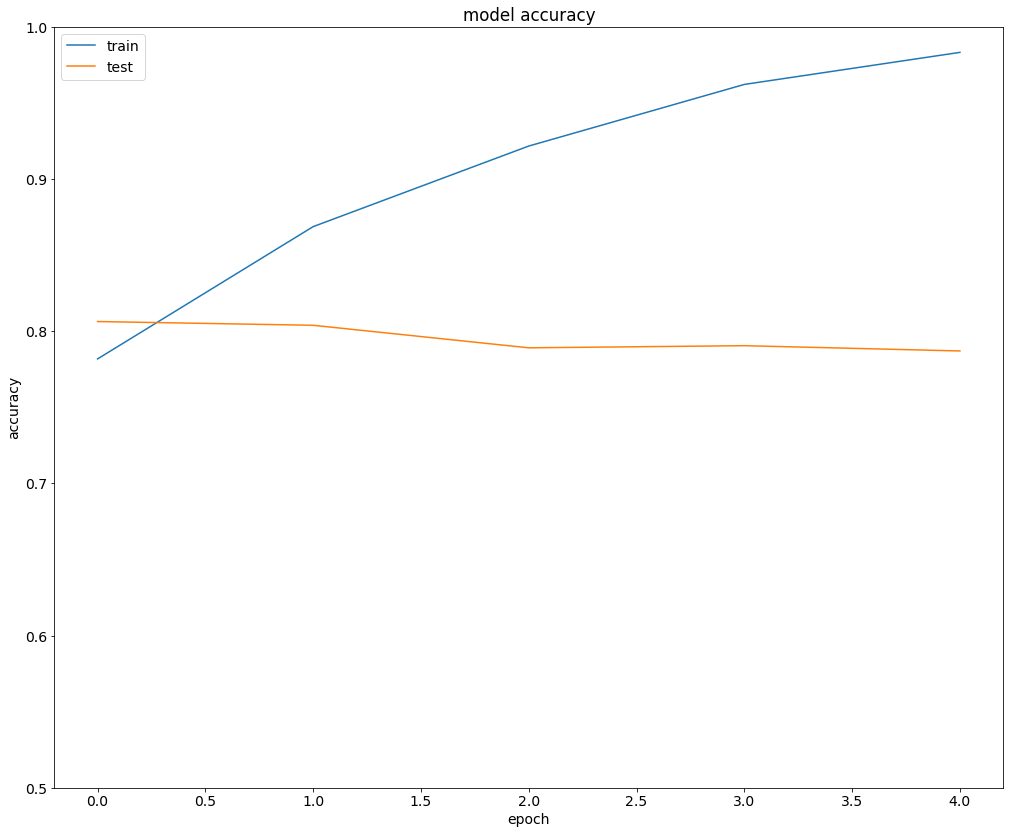

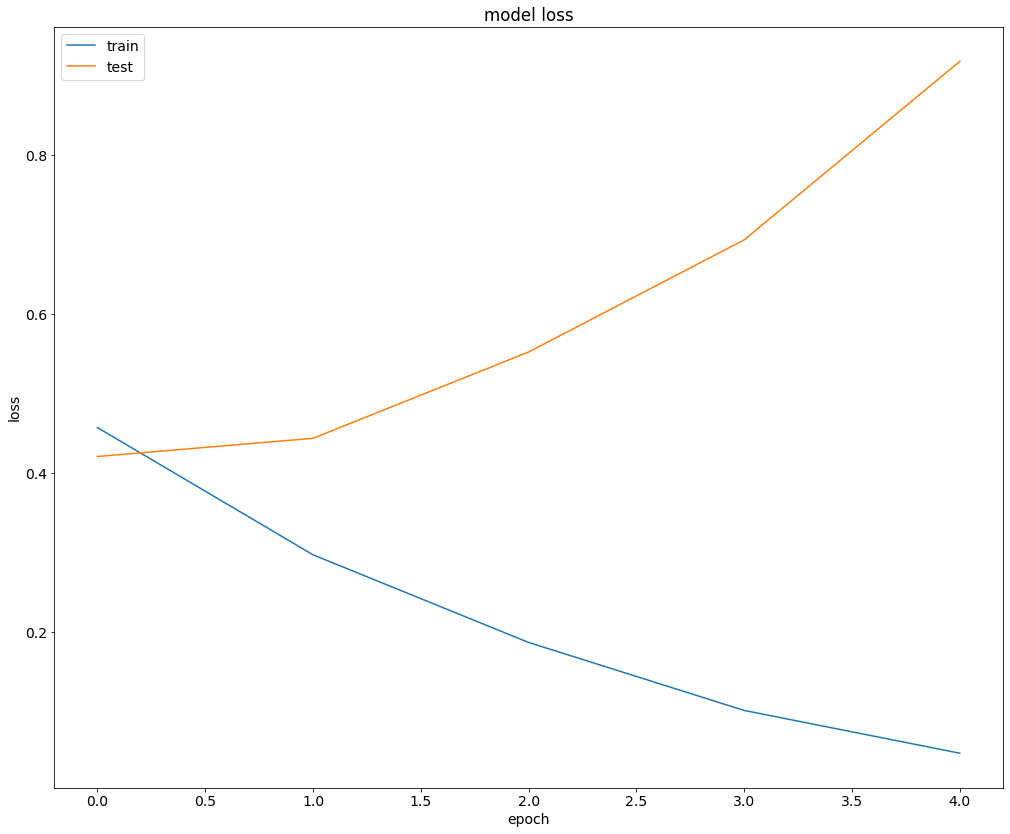

In [ ]:
plt.figure(figsize=(17,14))
plt.rc('font', size=14)
plt.ylim(0.5,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(17,14))
plt.rc('font', size=14)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()